# Python для анализа данных

*Алла Тамбовцева, НИУ ВШЭ*

## Web-scraping

Мы уже немного познакомились со структурой html-файлов, теперь попробуем выгрузить информацию из реальной страницы, а точнее, с реального сайта [nplus1.ru](https://nplus1.ru/).

**Наша задача:** выгрузить недавние новости в датафрейм `pandas`, чтобы потом сохранить все в csv-файл.

Сначала сгрузим весь html-код страницы и сохраним его в отдельную переменную. Для этого нам понадобится библиотека `requests`. Импортируем её:

In [66]:
s = '[(())]'
ls = list()
dict = {
    '[':']',
    '{':'}',
    '(':')'
}
ls.append(s[0])
def check_seq(string):
    for element in string[ 1: :1]:
        if dict.get(element) and ls[-1] == element:
            ls.pop()
        elif len(ls) == 0:
            print('one')
        else:
             ls.append(element)

    

print(ls)
check_seq(s)

['[']


In [67]:
import requests

Сохраним ссылку на главную страницу сайта в переменную `url` для удобства и выгрузим страницу. (Разумеется, это будет работать при подключении к интернету. Если соединение будет отключено, Python выдаст `NewConnectionError`).

In [68]:
url = 'https://nplus1.ru/' # сохраняем
page = requests.get(url) # загружаем страницу по ссылке

Если мы просто посмотрим на объект, мы ничего особенного не увидим:

In [69]:
page  # response 200 - страница загружена

<Response [200]>

Импортируем функцию `BeautifulSoup` из библиотеки `bs4` (от *beautifulsoup4*) и заберём со страницы `page` код html в виде текста. 

In [70]:
from bs4 import BeautifulSoup  # не спрашивайте, почему BeautifulSoup

In [71]:
soup = BeautifulSoup(page.text, 'lxml')

Если выведем `soup` на экран, мы увидим то же самое, что в режиме разработчика или в режиме происмотра исходного кода (`view-source` через *Ctrl+U* в Google Chrome).

In [72]:
soup

<!DOCTYPE html>
<html class="no-js bg-fixed" lang="" style="background-image:url(https://nplus1.ru/images/2021/09/28/6dcddecc418eb2afd45b87260f5b168f.jpg)">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="black" name="apple-mobile-web-app-status-bar-style"/>
<meta content="7991d7eb02d759f05b9050e111a7e3eb" name="wmail-verification"/>
<link href="https://nplus1.ru" rel="canonical"/>
<title>N+1: научные статьи, новости, открытия</title>
<!-- for Google -->
<meta content="N+1: научные статьи, новости, открытия" name="description"/>
<meta content="" name="author"/>
<meta content="" name="copyright"/>
<!-- for Facebook -->
<meta content="N+1: научные статьи, новости, открытия" property="og:title"/>
<meta content="https://nplus1.ru/i/logo.png" property="og:image"/>
<meta content="https://nplus1.ru" property="og:ur

Для просмотра выглядит не очень удобно.  «Причешем» наш `soup` – воспользуемся методом `.prettify()` в сочетании с функцией `print()`.

In [73]:
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js bg-fixed" lang="" style="background-image:url(https://nplus1.ru/images/2021/09/28/6dcddecc418eb2afd45b87260f5b168f.jpg)">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="black" name="apple-mobile-web-app-status-bar-style"/>
  <meta content="7991d7eb02d759f05b9050e111a7e3eb" name="wmail-verification"/>
  <link href="https://nplus1.ru" rel="canonical"/>
  <title>
   N+1: научные статьи, новости, открытия
  </title>
  <!-- for Google -->
  <meta content="N+1: научные статьи, новости, открытия" name="description"/>
  <meta content="" name="author"/>
  <meta content="" name="copyright"/>
  <!-- for Facebook -->
  <meta content="N+1: научные статьи, новости, открытия" property="og:title"/>
  <meta content="https://nplus1.ru/i/logo.png" property="og:image"/>
  <meta con

В такой выдаче ориентироваться гораздо удобнее (но при желании, то же можно увидеть в браузере, на большом экране).

Чтобы сгрузить все новости с главной страницы сайта, нужно собрать все ссылки на страницы с этими новостями. Ссылки в html-файле всегда заключены в тэг `<a></a>` и имеют атрибут `href`. Посмотрим на кусочки кода, соответствующие всем ссылкам на главной странице сайта:

In [74]:
for link in soup.find_all('a'):
    print(link.get('href'))

#
/
#
#
/rubric/astronomy
/rubric/physics
/rubric/biology
/rubric/robots-drones
/theme/explainatorium
/theme/bookshelf
/theme/Courses
/theme/coronavirus-history
/theme/offline
/
#
/rubric/astronomy
/rubric/physics
/rubric/biology
/rubric/robots-drones
#
/theme/explainatorium
/theme/bookshelf
/theme/Courses
/theme/coronavirus-history
/theme/offline
https://nplus1.ru/blog/2021/09/27/Its-The-end-of-the-world
https://nplus1.ru/blog/2021/09/27/Its-The-end-of-the-world
https://nplus1.ru/blog/2021/09/23/cosmological-koans
https://nplus1.ru/blog/2021/09/21/the-French-Revolution
https://nplus1.ru/blog/2021/09/16/lone-survivors
https://nplus1.ru/blog/2021/09/14/bones-inside-and-out
https://nplus1.ru/blog/2021/09/09/13lost
https://nplus1.ru/blog/2021/09/08/when-the-earth-had-two-moons
https://nplus1.ru/blog/2021/09/06/stress-pain-and-opioids
https://nplus1.ru/blog/2021/08/27/infinite-powers
https://nplus1.ru/blog/2021/09/28/unsere-welt-neu-denken
/news/2021/09/28/rTMS-verbal-memory
/news/2021/09/

Ссылок много. Но нам нужны только новости – ссылки, которые начинаются со слова `/news`. Добавим условие: будем выбирать только те ссылки, в которых есть `/news`. Создадим пустой список `urls` и будем добавлять в него только ссылки, которые удовлетворяют этому условию.

In [75]:
urls = []

for link in soup.find_all('a'):
    if '/news' in link.get('href'):
        urls.append(link.get('href'))
urls

['/news/2021/09/28/rTMS-verbal-memory',
 '/news/2021/09/28/desmodus-rotundus',
 '/news/2021/09/28/starlink-geo',
 '/news/2021/09/28/grs-hubble',
 '/news/2021/09/28/twins-methylation',
 '/news/2021/09/28/block3',
 '/news/2021/09/28/wasp-127-clouds',
 '/news/2021/09/28/tissue-or-landscape',
 '/news/2021/09/28/merlin',
 '/news/2021/09/28/dolmen-spain',
 '/news/2021/09/28/life-covid',
 '/news/2021/09/28/hawc',
 '/news/2021/09/28/seated-burials',
 '/news/2021/09/28/archaehierax-sylvestris',
 '/news/2021/09/28/spicomellus-afer',
 '/news/2021/09/27/SED',
 '/news/2021/09/27/darpa-subt',
 '/news/2021/09/27/plocepasser-mahali',
 '/news/2021/09/27/ch-6',
 '/news/2021/09/27/shutdown-of-southern-ocean-convection',
 '/news/2021/09/17/penguin-test',
 '/news/2021/09/24/magic-people-voodoo-people',
 '/news/2021/09/21/raman-transfer',
 '/news/2021/09/23/single-phonon-evidence',
 '/news/2021/09/22/100ms-coherence',
 '/news/2021/09/24/quantum-limit-planet',
 '/news/2021/09/22/single-photon-nonlinear',
 '/

Ссылки, которые у нас есть в списке `urls`, относительные: они неполные, начало ссылки (название сайта) отсутствует. Давайте превратим их в абсолютные ‒ склеим с ссылкой https://nplus1.ru.

In [76]:
full_urls = []

for u in urls:
    res = 'https://nplus1.ru' + u
    full_urls.append(res) 

full_urls

['https://nplus1.ru/news/2021/09/28/rTMS-verbal-memory',
 'https://nplus1.ru/news/2021/09/28/desmodus-rotundus',
 'https://nplus1.ru/news/2021/09/28/starlink-geo',
 'https://nplus1.ru/news/2021/09/28/grs-hubble',
 'https://nplus1.ru/news/2021/09/28/twins-methylation',
 'https://nplus1.ru/news/2021/09/28/block3',
 'https://nplus1.ru/news/2021/09/28/wasp-127-clouds',
 'https://nplus1.ru/news/2021/09/28/tissue-or-landscape',
 'https://nplus1.ru/news/2021/09/28/merlin',
 'https://nplus1.ru/news/2021/09/28/dolmen-spain',
 'https://nplus1.ru/news/2021/09/28/life-covid',
 'https://nplus1.ru/news/2021/09/28/hawc',
 'https://nplus1.ru/news/2021/09/28/seated-burials',
 'https://nplus1.ru/news/2021/09/28/archaehierax-sylvestris',
 'https://nplus1.ru/news/2021/09/28/spicomellus-afer',
 'https://nplus1.ru/news/2021/09/27/SED',
 'https://nplus1.ru/news/2021/09/27/darpa-subt',
 'https://nplus1.ru/news/2021/09/27/plocepasser-mahali',
 'https://nplus1.ru/news/2021/09/27/ch-6',
 'https://nplus1.ru/news/

Теперь наша задача сводится к следующему: изучить одну страницу с новостью, научиться из нее вытаскивать текст и всю необходимую информацию, а потом применить весь набор действий к каждой ссылке из `full_urls` в цикле. Посмотрим на новость с индексом 1, у вас может быть другая, новости обновляются.

In [77]:
url0 = full_urls[1]

page0 = requests.get(url0)
soup0 = BeautifulSoup(page0.text, 'lxml')

В коде каждой страницы с новостью есть часть с мета-информацией: датой, именем автора и проч. Такая информация окружена тэгом `<meta></meta>`. Посмотрим:

In [78]:
soup0.find_all('meta')

[<meta charset="utf-8"/>,
 <meta content="ie=edge" http-equiv="x-ua-compatible"/>,
 <meta content="width=device-width, initial-scale=1" name="viewport"/>,
 <meta content="yes" name="apple-mobile-web-app-capable"/>,
 <meta content="black" name="apple-mobile-web-app-status-bar-style"/>,
 <meta content="7991d7eb02d759f05b9050e111a7e3eb" name="wmail-verification"/>,
 <meta content="2021-09-28" itemprop="datePublished"/>,
 <meta content="Сергей Коленов" name="mediator_author"/>,
 <meta content="Ранее считалось, что дружеские связи этих рукокрылых проявляются лишь в местах отдыха." name="description"/>,
 <meta content="Сергей Коленов" name="author"/>,
 <meta content="" name="copyright"/>,
 <meta content="Самки обыкновенных вампиров попили крови вместе с подругами и родственницами" property="og:title"/>,
 <meta content="https://nplus1.ru/images/2021/09/28/225b9d2b834b7a0b6b499fc443b8dd32.gif" property="og:image"/>,
 <meta content="https://nplus1.ru/news/2021/09/28/desmodus-rotundus" property=

Из этого списка нам нужны части с именем автора, датой, заголовком и кратким описанием. Воспользуемся поиском по атрибуту `name`. Передадим функции `find_all()` в качестве аргумента словарь с названием и значением атрибута: 

In [79]:
soup0.find_all('meta', {'name' : 'author'}) # например, автор

[<meta content="Сергей Коленов" name="author"/>]

Теперь выберем единственный элемент полученного списка (с индексом 0):

In [80]:
soup0.find_all('meta', {'name' : 'author'})[0]

<meta content="Сергей Коленов" name="author"/>

Нам нужно вытащить из этого объекта `content` – имя автора. Посмотрим на атрибуты:

In [81]:
soup0.find_all('meta', {'name' : 'author'})[0].attrs

{'name': 'author', 'content': 'Сергей Коленов'}

Как получить отсюда `content`? Очень просто, ведь это словарь! А доставать из словаря значение по ключу мы умеем.

In [82]:
author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
author

'Сергей Коленов'

Аналогичным образом извлечем дату, заголовок и описание.

In [83]:
date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']

Осталось вытащить рубрики и сложность текста. Если мы посмотрим на исходный код страницы, мы увидим, что нужная нам информация находится в тэгах `<p></p>`:

In [84]:
soup0.find_all('p')

[<p class="table">
 <a data-rubric="zoology" href="/rubric/zoology">Зоология</a>
 </p>,
 <p class="table">
 <a href="/news/2021/09/28">
 <time content="2021-09-28" data-unix="1632852348" itemprop="datePublished">
 <span>21:05</span>
 <span>28 Сен. 2021</span>
 </time>
 </a>
 </p>,
 <p class="table">
 <a href="/difficult/4.1">
 <span>Сложность</span>
 <span class="difficult-value">4.1</span>
 </a>
 </p>,
 <p class="title">Две самки обыкновенного вампира (<i>Desmodus rotundus</i>) напали на одну и ту же корову.</p>,
 <p class="credits">Simon P. RippergerI &amp; Gerald G. Carter / PLoS Biology, 2021</p>,
 <p>Зоологи выяснили, что самки обыкновенных вампиров регулярно пьют кровь вместе с подругами и родственницами. Ранее считалось, что дружеские связи этих рукокрылых проявляются лишь внутри колоний, во время отдыха. По мнению авторов исследования, совместное кормление кровью одних и тех же жертв укрепляет связи между вампирами — а также позволяет сэкономить энергию, необходимую для прокусы

Выберем из полученного списка первый элемент и найдем в нем все тэги `<a>`:

In [85]:
soup0.find_all('p')[0].find_all('a')

[<a data-rubric="zoology" href="/rubric/zoology">Зоология</a>]

Получился список из одного элемента. Применим списковые включения – вытащим из каждого элемента (их могло бы быть больше) текст и поместим его в новый список `rubrics`.

In [86]:
rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
rubrics

['Зоология']

Осталась только сложность. Возьмем соответствующий кусок кода:

In [87]:
soup0.find_all('span', {'class' : 'difficult-value'})

[<span class="difficult-value">4.1</span>]

И выберем оттуда текст.

In [88]:
diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
diff

'4.1'

Теперь перейдем к тексту самой новости. Как можно заметить, текст сохранен в абзацах `<p></p>`, причем безо всяких атрибутов. Сообщим Python, что нас интересуют куски с пустым атрибутом `class`:

In [89]:
text_list = soup0.find_all('p', {'class' : None})

«Выцепим» все тексты (без тэгов) из полученного списка:

In [90]:
text = [t.text for t in text_list]

Склеим все элементы списка `text` через пробел:

In [91]:
final_text = ' '.join(text)
final_text

'Зоологи выяснили, что самки обыкновенных вампиров регулярно пьют кровь вместе с\xa0подругами и\xa0родственницами. Ранее считалось, что дружеские связи этих рукокрылых проявляются лишь внутри колоний, во\xa0время отдыха. По\xa0мнению авторов исследования, совместное кормление кровью одних и\xa0тех\xa0же жертв укрепляет связи между вампирами\xa0— а\xa0также позволяет сэкономить энергию, необходимую для прокусывания кожи, и\xa0при необходимости дать отпор конкуренту из\xa0чужой колонии. Результаты исследования опубликованы в\xa0статье для журнала PloS Biology. Обыкновенные вампиры (Desmodus rotundus) давно стали излюбленным объектом изучения зоологов. Дело в\xa0том, что для отдыха в\xa0светлое время суток самки этих летучих мышей собираются большими группами, члены которых делятся друг с\xa0другом добытой кровью и\xa0формируют крепкие дружеские связи. Ученые надеются, что, наблюдая за\xa0вампирами, они смогут больше узнать об\xa0эволюции социальности, в\xa0том числе у\xa0людей. Команда с

Все здорово, только мешают отступы-переходы на новую строку `\n`. Заменим их на пробелы с помощью метода `.replace`:

In [92]:
final_text = final_text.replace('\n', ' ')

Не прошло и двух пар, как мы разобрались со всем :) Теперь осталось совсем чуть-чуть. Написать готовую функцию для всех проделанных нами действий и применить ее в цикле для всех ссылок в списке `full_urls`. Напишем! Аргументом функции будет ссылка на новость, а возвращать она будет текст новости и всю необходимую информацию (дата, автор, сложность и проч.). Скопируем все строки кода выше.

In [93]:
def GetNews(url0):
    """
    Returns a tuple with url0, date, author, description, title, final_text, rubrics, diff.
    Parameters:
    
    url0 is a link to the news (string)
    """
    page0 = requests.get(url0)
    soup0 = BeautifulSoup(page0.text, 'lxml')
    author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
    date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
    title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
    description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']
    rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
    diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
    text_list = soup0.find_all('p', {'class' : None})
    text = [t.text for t in text_list]
    final_text = ' '.join(text)
    final_text = final_text.replace('\n', ' ')
    
    return url0, date, author, description, title, final_text, rubrics, diff

Уфф. Осталось применить ее в цикле. Но давайте не будем спешить: импортируем функцию `sleep` для задержки, чтобы на каждой итерации цикла, прежде чем перейти к следующей новости, Python ждал несколько секунд. Во-первых, это нужно, чтобы сайт «не понял», чтобы мы его грабим, да еще автоматически. Во-вторых, с небольшой задержкой всегда есть гарантия, что страница прогрузится (сейчас это пока не очень важно, но особенно актуально будет, когда будем обсуждать встраивание в браузер с Selenium). Приступим.

In [94]:
from time import sleep

In [95]:
news = [] # это будет список из кортежей, в которых будут храниться данные по каждой новости

for link in full_urls:
    res = GetNews(link)
    news.append(res)
    sleep(3) # задержка в 3 секунды

Так теперь выглядит первый элемент списка:

In [96]:
news[0]

('https://nplus1.ru/news/2021/09/28/rTMS-verbal-memory',
 '2021-09-28',
 'Екатерина Рощина',
 'И сопровождалась снижением бета-волн - состоянием полезным для запоминания',
 'Транскраниальная магнитная стимуляция улучшила кратковременную вербальную память',
 'Левая дорсолатеральная префронтальсвязаная кора играет важную роль в\xa0формировании вербальной памяти: если во\xa0время запоминания слов, любого текста, или его отрывка стимулировать эту область, то\xa0после, при попытке воспроизвести запомненное, обнаружится снижение производительности памяти. Причем такое снижение производительности в\xa0основном отмечается при применении возбуждающей транскраниальной магнитной стимуляции (ТМС) с\xa0частотой колебаний 20\xa0герц. Таким образом, кажется, что активность левой дорсолатеральной префронтальной коры может иметь обратную связь с\xa0производительностью памяти. Соответственно, можно предположить, что, подавляя активность левой дорсолатеральной префронтальной коры, возможно увеличить прои

Импортируем `pandas` и создадим датафрейм из списка кортежей: 

In [97]:
import pandas as pd

In [98]:
df = pd.DataFrame(news)

In [99]:
df.head(2)

,0,1,2,3,4,5,6,7
0,https://nplus1.ru/news/2021/09/28/rTMS-verbal-...,2021-09-28,Екатерина Рощина,И сопровождалась снижением бета-волн - состоян...,Транскраниальная магнитная стимуляция улучшила...,Левая дорсолатеральная префронтальсвязаная кор...,"[Медицина, Психология, Нейронауки]",3.2
1,https://nplus1.ru/news/2021/09/28/desmodus-rot...,2021-09-28,Сергей Коленов,"Ранее считалось, что дружеские связи этих руко...",Самки обыкновенных вампиров попили крови вмест...,"Зоологи выяснили, что самки обыкновенных вампи...",[Зоология],4.1


Переименуем столбцы в базе.

In [100]:
df.columns = ['link', 'date', 'author', 'desc', 'title', 'text', 'rubric', 'diffc']

In [101]:
df.head(2)

,link,date,author,desc,title,text,rubric,diffc
0,https://nplus1.ru/news/2021/09/28/rTMS-verbal-...,2021-09-28,Екатерина Рощина,И сопровождалась снижением бета-волн - состоян...,Транскраниальная магнитная стимуляция улучшила...,Левая дорсолатеральная префронтальсвязаная кор...,"[Медицина, Психология, Нейронауки]",3.2
1,https://nplus1.ru/news/2021/09/28/desmodus-rot...,2021-09-28,Сергей Коленов,"Ранее считалось, что дружеские связи этих руко...",Самки обыкновенных вампиров попили крови вмест...,"Зоологи выяснили, что самки обыкновенных вампи...",[Зоология],4.1


Теперь внесем изменения: сделаем столбец `diffc` числовым – типа *float*.

In [102]:
df['diffc'] = [float(i) for i in df.diffc]

Теперь сложность представлена в базе как количественный показатель, и описывать ее можно соответствующим образом:

In [103]:
df.diffc.describe()

count    30.000000
mean      4.293333
std       1.766925
min       1.800000
25%       3.100000
50%       3.500000
75%       5.050000
max       8.300000
Name: diffc, dtype: float64

Теперь столбец со сложностью точно числовой. Можем даже построить для него гистограмму.

<AxesSubplot:ylabel='Frequency'>

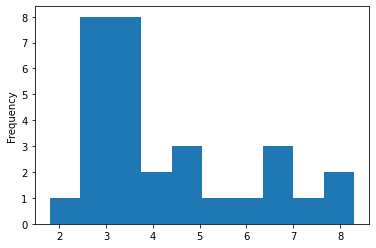

In [104]:
%matplotlib inline
df.diffc.plot.hist()

Объединим рубрики в *text* в одну строку через запятую:

In [105]:
df['rubric'] = [','.join(r) for r in df.rubric]

Давайте почистим текст новостей – уберем оттуда текст, не относящийся к новостям. Найдем лишнее:

In [106]:
df.text[0]

'Левая дорсолатеральная префронтальсвязаная кора играет важную роль в\xa0формировании вербальной памяти: если во\xa0время запоминания слов, любого текста, или его отрывка стимулировать эту область, то\xa0после, при попытке воспроизвести запомненное, обнаружится снижение производительности памяти. Причем такое снижение производительности в\xa0основном отмечается при применении возбуждающей транскраниальной магнитной стимуляции (ТМС) с\xa0частотой колебаний 20\xa0герц. Таким образом, кажется, что активность левой дорсолатеральной префронтальной коры может иметь обратную связь с\xa0производительностью памяти. Соответственно, можно предположить, что, подавляя активность левой дорсолатеральной префронтальной коры, возможно увеличить производительность памяти. А\xa0тот факт, что применение медленной (с\xa0частотой один герц) повторяющейся ТМС оказывает тормозящее действие на\xa0моторные области, подсказывает метод воздействия. Мирче ван дер Плас (Mircea van der Plas) и\xa0его коллеги провери

Лишний текст находится после фразы 'Нашли опечатку?'. Так давайте будем разбивать строки по этой фразе с помощью метода `.split()` и брать все, что до нее (элемент с индексом 0).

In [107]:
df['clean_text'] = [t.split('Нашли опечатку?')[0] for t in df.text]

Осталось только заменить непонятные символы `\xa0` на пробелы:

In [108]:
df['clean_text'] = [t.replace("\xa0", " ") for t in df.clean_text]

In [109]:
df.clean_text[0]

'Левая дорсолатеральная префронтальсвязаная кора играет важную роль в формировании вербальной памяти: если во время запоминания слов, любого текста, или его отрывка стимулировать эту область, то после, при попытке воспроизвести запомненное, обнаружится снижение производительности памяти. Причем такое снижение производительности в основном отмечается при применении возбуждающей транскраниальной магнитной стимуляции (ТМС) с частотой колебаний 20 герц. Таким образом, кажется, что активность левой дорсолатеральной префронтальной коры может иметь обратную связь с производительностью памяти. Соответственно, можно предположить, что, подавляя активность левой дорсолатеральной префронтальной коры, возможно увеличить производительность памяти. А тот факт, что применение медленной (с частотой один герц) повторяющейся ТМС оказывает тормозящее действие на моторные области, подсказывает метод воздействия. Мирче ван дер Плас (Mircea van der Plas) и его коллеги проверили эту гипотезу, повторно проанал

Всё! Сохраняем датафрейм в файл. Для разнообразия сохраним в Excel:

In [110]:
df.to_excel('nplus-news.xlsx')